This notebook will explore the Ridge property data as modeled by FVS and the Ecotrust Growth-Yield-Batch system. Also serves as a demonstration of pandas and associated python libraries.

First, we import the necessary libraries

In [1]:
%matplotlib inline
from matplotlib.pylab import plt
import pandas as pd
from sqlalchemy import create_engine
from matplotlib import cm
import seaborn as sns

Create a connection ("engine") to the sqlite database produced by GYB and read the entire table into a pandas DataFrame.

In [2]:
engine = create_engine('sqlite:///final/data.db')
df = pd.read_sql_table('trees_fvsaggregate', engine)

Ipython is not the cleanest interface with which to browse large datasets. Luckily you can just take the top couple rows

In [23]:
df.head(6)

,accretion,after_ba,after_merch_bdft,after_merch_ft3,after_qmd,after_sdi,after_total_ft3,after_tpa,age,climate,...,merch_carbon_stored,agl,bgl,calc_carbon,dead,total_stand_carbon,econ_removed_merch_bdft,econ_removed_merch_ft3,undiscounted_revenue,harvest_report
0,8,6,1483,247,13.4,9,257,6,1,NoClimate,...,0,2.0,0.5,2.5,0.0,19.9,0,0,0,NaN
1,18,6,1727,283,1.7,23,295,397,6,NoClimate,...,0,2.2,0.7,2.9,0.0,18.4,0,0,0,NaN
2,63,14,2023,325,2.6,44,382,386,11,NoClimate,...,0,3.4,0.9,4.4,0.1,17.9,0,0,0,NaN
3,245,26,2472,397,4.6,65,588,225,16,NoClimate,...,0,5.4,1.5,7.0,0.1,15.8,0,0,0,NaN
4,318,70,5454,1077,7.7,142,1804,218,21,NoClimate,...,0,15.2,3.9,19.3,0.2,27.3,0,0,0,NaN
5,397,122,17051,3200,7.3,254,3322,420,26,NoClimate,...,0,27.6,7.5,35.8,0.7,43.8,0,0,0,NaN


or write it to excel with `df.to_excel('file.txt')`. Keep in mind the size of the dataset though, not recommended for the full dataset due to limitations in excel

In [5]:
df.shape  # (rows, columns)

(78771, 79)

Basic descriptive statistics

In [6]:
df.describe()

,accretion,after_ba,after_merch_bdft,after_merch_ft3,after_qmd,after_sdi,after_total_ft3,after_tpa,age,cond,...,merch_carbon_removed,merch_carbon_stored,agl,bgl,calc_carbon,dead,total_stand_carbon,econ_removed_merch_bdft,econ_removed_merch_ft3,undiscounted_revenue
count,78771.000000,78771.000000,78771.000000,78771.000000,78771.000000,78771.000000,78771.000000,78771.000000,78771.000000,78771.000000,...,75020.000000,75020.00000,75020.000000,75020.000000,75020.000000,75020.000000,75020.000000,75020.000000,75020.000000,75020
mean,215.033020,115.604283,19344.996268,3503.485369,8.577540,233.173224,4069.476013,499.578639,41.976654,16.000000,...,18.617907,9.53667,28.280343,6.374416,40.006165,5.351406,53.878847,2324.656198,449.874034,0
std,150.567272,85.748687,16651.109705,3097.844791,6.362337,151.742939,3370.684004,354.428643,28.041485,8.944329,...,23.259502,12.86700,23.456292,5.117430,33.902989,7.175964,38.056915,8353.211317,1618.356817,0
min,0.000000,3.000000,544.000000,101.000000,1.200000,5.000000,111.000000,3.000000,0.000000,1.000000,...,0.000000,0.00000,0.800000,0.200000,1.000000,0.000000,7.500000,0.000000,0.000000,0
25%,63.000000,37.000000,5615.000000,980.000000,4.200000,92.000000,1217.000000,300.000000,20.000000,8.000000,...,0.000000,0.00000,8.200000,2.100000,12.000000,0.200000,21.300000,0.000000,0.000000,0
50%,225.000000,98.000000,14882.000000,2570.000000,6.900000,225.000000,3215.000000,405.000000,40.000000,16.000000,...,4.800000,2.00000,21.900000,5.100000,31.300000,2.600000,47.000000,0.000000,0.000000,0
75%,335.000000,187.000000,29248.000000,5281.000000,10.200000,368.000000,6176.000000,652.000000,60.000000,24.000000,...,33.900000,16.30000,43.000000,9.600000,59.100000,7.800000,75.200000,0.000000,0.000000,0
max,655.000000,335.000000,104154.000000,17523.000000,43.100000,548.000000,18815.000000,2551.000000,170.000000,31.000000,...,131.800000,79.40000,121.800000,24.400000,188.200000,49.000000,244.900000,81770.000000,13639.000000,0


The best feature of both pandas and excel: pivot tables. And note that we can write the resulting DataFrame out to an excel file for easier viewing.

In [21]:
import numpy as np

pt_year = pd.pivot_table(df,
    index=['cond', 'rx', 'offset'],
    columns=['year'],
    values=['removed_merch_bdft'],
    aggfunc=[np.sum],  
    margins=True)

pt_year.to_excel("harvest_by_year.xls")
pt_year.head()

sum                                            \
               removed_merch_bdft                                             
year                         2013 2018 2023 2028 2033 2038 2043 2048   2053   
cond rx offset                                                                
1    1  0                       0    0    0    0    0    0    0    0      0   
     2  0                      78    0    0    0    0    0    0    0  49018   
        5                       0  116    0    0    0    0    0    0      0   
        10                      0    0  166    0    0    0    0    0      0   
        15                      0    0    0  240    0    0    0    0      0   

                       ...                                                    \
                       ...                                                     
year             2058  ...   2073 2078 2083 2088   2093   2098   2103   2108   
cond rx offset         ...                                                     
1    1  0           0  ...      0    0    0    0      0      0      0      0   
     2  0           0  ...      0    0    0    0  46336      0      0      0   
        5       39567  ...      0    0    0    0      0  45703      0      0   
        10          0  ...      0    0    0    0      0      0  44688      0   
        15          0  ...      0    0    0    0      0      0      0  44935   

                            
                            
year           2113    All  
cond rx offset              
1    1  0         0      0  
     2  0         0  95432  
        5         0  85386  
        10        0  83398  
        15        0  88480  

[5 rows x 22 columns]

In testing in the Forest Planner, we noticed that yields were very low initially and that stands were starting the simulation at single-digit trees per acre (TPA). Let's confirm that...

First subset the query for the grow-only rx in 2013.

In [34]:
startdf = df.query("year == 2013 and rx == 1")

# same result with alternate syntax using .loc
startdf = df.loc[(df.year == 2013) & (df.rx == 1)]

Examining the distribution of starting TPA, we see very low TPAs, most likely an error occured in the growth and yield process

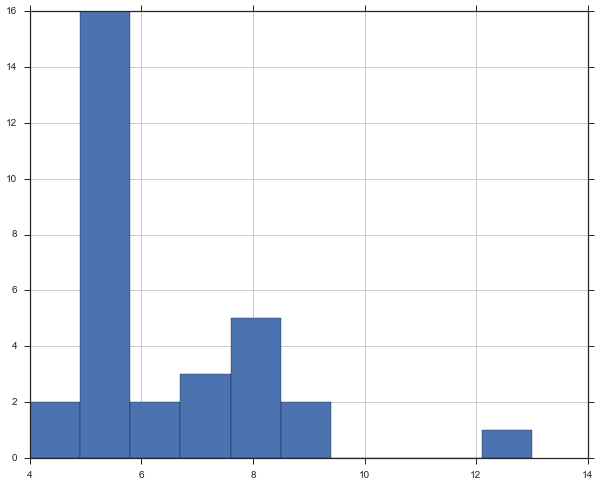

In [35]:
startdf.start_tpa.hist()

In [8]:
conds = df.cond.unique()
conds.sort()
conds

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

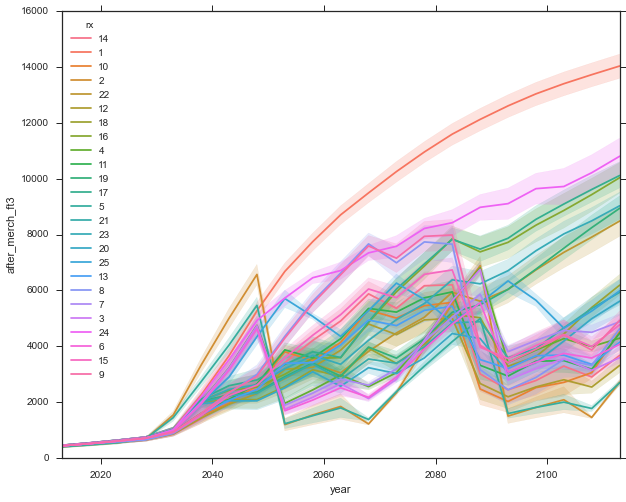

In [16]:
plt.rcParams['figure.figsize'] = (10.0, 8.0)
sns.tsplot(df.loc[(df.offset == 0)],
           "year", unit="cond", condition="rx", value="after_merch_ft3")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10a898a50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10f50f550>]], dtype=object)

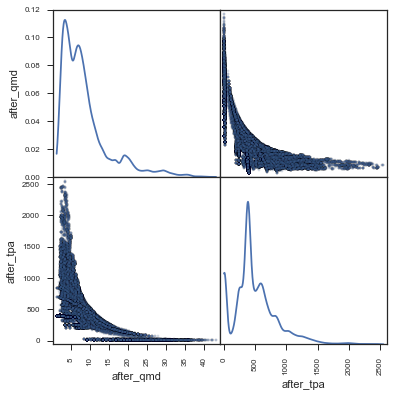

In [13]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(df[['after_qmd', 'after_tpa']],
               alpha=0.2, figsize=(6, 6), diagonal='kde')